# Import Libraries

In [2]:
import keras
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
import PIL
from PIL import Image
from keras.layers import Conv2D,Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Loading Data

In [3]:
dataset_path = '/kaggle/input/imagesoasis/Data'

IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 16

In [4]:

non_demented = []
very_mild_demented = []
mild_demented = []
moderate_demented = []

for dirname, _, filenames in os.walk('/kaggle/input/imagesoasis/Data'):
    for filename in filenames:
        file_path = os.path.join(dirname, filename)
        if 'Non Demented' in dirname:
            non_demented.append(file_path)
        elif 'Very mild Dementia' in dirname:
            very_mild_demented.append(file_path)
        elif 'Mild Dementia' in dirname:
            mild_demented.append(file_path)
        elif 'Moderate Dementia' in dirname:
            moderate_demented.append(file_path)

print(f"Non Demented: {len(non_demented)} images")
print(f"Very Mild Demented: {len(very_mild_demented)} images")
print(f"Mild Demented: {len(mild_demented)} images")
print(f"Moderate Demented: {len(moderate_demented)} images")

Non Demented: 67222 images
Very Mild Demented: 13725 images
Mild Demented: 5002 images
Moderate Demented: 488 images


In [5]:
non_demented=non_demented[0:488]
mild_demented=mild_demented[0:488]
very_mild_demented=very_mild_demented[0:488]
print(len(non_demented))
print(len(mild_demented))
print(len(moderate_demented))
print(len(very_mild_demented))

488
488
488
488


# OneHotEncoder

In [6]:
encoder= OneHotEncoder()
encoder.fit([[0],[1],[2],[3]])

OneHotEncoder()

# Images Processing

In [7]:
data = []
result = []
def process_images(image_list, label):
    for s in image_list:
        img = Image.open(s)
        img = img.resize((128, 128))
        img = np.array(img)
        if img.shape == (128, 128, 3):
            data.append(img)
            result.append(encoder.transform([[label]]).toarray())

process_images(non_demented, 0)
process_images(mild_demented, 1)
process_images(moderate_demented, 2)
process_images(very_mild_demented, 3)

In [8]:
X=np.array(data)
X.shape


(1952, 128, 128, 3)

In [9]:
y=np.array(result)
y=y.reshape(X.shape[0],4)
y=np.argmax(y, axis=1)
y

array([0, 0, 0, ..., 3, 3, 3])

# Splitting dataset into train and test

In [10]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape

(1561, 128, 128, 3)

In [11]:
X_test.shape


(391, 128, 128, 3)

# CustomCNN Model

In [12]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=2,padding='Same',input_shape = (128,128,3)))


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.add(Conv2D(filters=32,kernel_size=2,padding='Same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64,kernel_size=2,padding='Same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=2,padding='Same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=128,kernel_size=2,padding='Same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=2,padding='Same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=256,kernel_size=2,padding='Same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=2,padding='Same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4,activation='sigmoid'))

In [14]:
print(model.summary())


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 256)    │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 256)    │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     8,389,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             

 Total params: 8,914,628 (34.01 MB)

 Trainable params: 8,913,668 (34.00 MB)

 Non-trainable params: 960 (3.75 KB)

None


In [15]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Model Training

In [16]:
from keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)
history= model.fit(X_train,y_train, validation_split=0.2,epochs=50,callbacks=[early_stopping],batch_size=32)

Epoch 1/50


I0000 00:00:1728155913.999712     101 service.cc:145] XLA service 0x7efcfc01c700 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728155913.999765     101 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1728155913.999769     101 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 3/39 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.1997 - loss: 26.1571

I0000 00:00:1728155927.658352     101 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


39/39 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - accuracy: 0.3573 - loss: 12.4438 - val_accuracy: 0.3514 - val_loss: 1.3348
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.5761 - loss: 1.0399 - val_accuracy: 0.4952 - val_loss: 1.2085
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.6238 - loss: 0.8612 - val_accuracy: 0.4920 - val_loss: 1.1046
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7048 - loss: 0.7035 - val_accuracy: 0.6134 - val_loss: 0.8918
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7226 - loss: 0.6320 - val_accuracy: 0.6997 - val_loss: 0.7147
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7812 - loss: 0.5570 - val_accuracy: 0.6422 - val_loss: 0.7414
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7858 - loss: 0.5090 - val_accuracy: 0.6773 - val_loss: 0.7337
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7649 - loss: 0.5463 - val_accuracy: 0.6550 - val_loss: 

# Evalation of model on the test set

In [20]:
model.evaluate(X_test,y_test)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7930 - loss: 1.1264


[1.161276936531067, 0.7953964471817017]

# Plot Accuracy

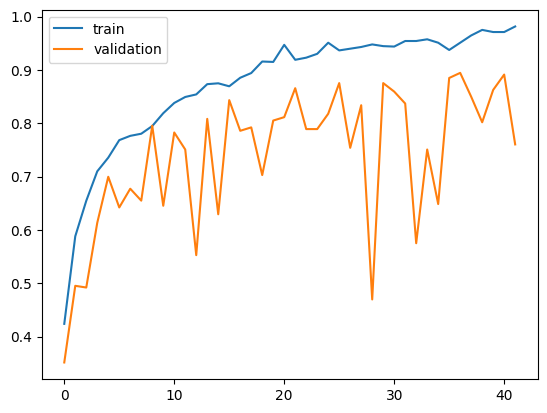

In [21]:
%matplotlib inline 
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='validation')
plt.legend()
plt.show()

# Plot Predictions

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


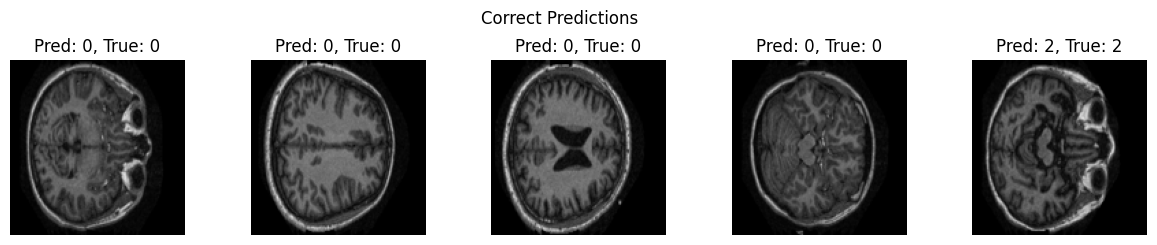

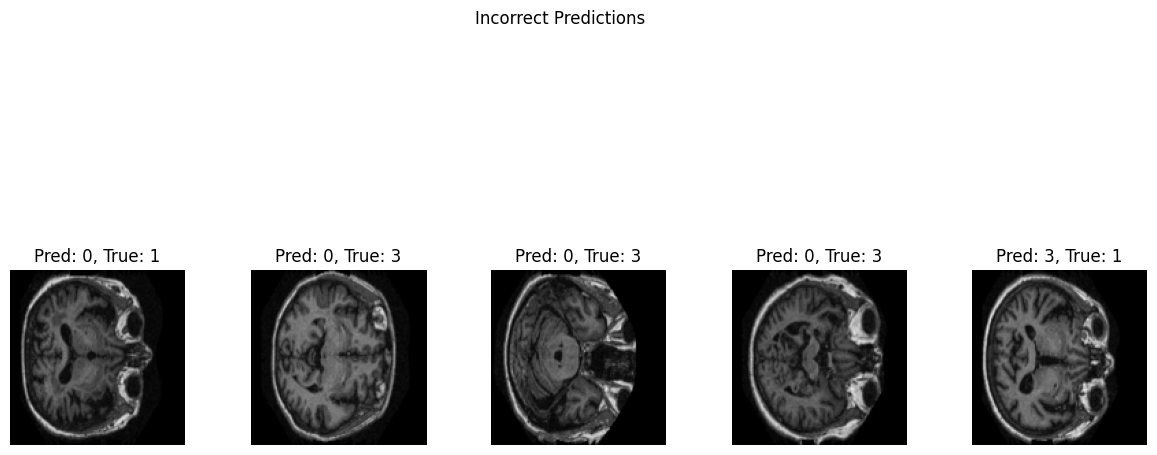

In [22]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

correct_indices = np.where(predicted_classes == y_test)[0]
incorrect_indices = np.where(predicted_classes != y_test)[0]

plt.figure(figsize=(15, 5))
for i, idx in enumerate(random.sample(list(correct_indices), 5)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx])
    plt.title(f"Pred: {predicted_classes[idx]}, True: {y_test[idx]}")
    plt.axis('off')
plt.suptitle('Correct Predictions')
plt.show()

plt.figure(figsize=(15, 5))
for i, idx in enumerate(random.sample(list(incorrect_indices), 5)):
    plt.subplot(2, 5, i + 6)
    plt.imshow(X_test[idx])
    plt.title(f"Pred: {predicted_classes[idx]}, True: {y_test[idx]}")
    plt.axis('off')
plt.suptitle('Incorrect Predictions')
plt.show()